In [4]:
import scanpy as sc
import pandas as pd 
import numpy as np
import seaborn as sns 
import os 
import matplotlib.pyplot as plt

/ihome/djishnu/alw399/.local/lib/python3.9/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


### Reload

In [5]:
from glob import glob 

sample = 2

adatas = glob(f'results/lymph_nodes_analysis/cell2location_map_{sample}/*.h5ad')
adatas = [sc.read_h5ad(f) for f in adatas]
adatas


[AnnData object with n_obs × n_vars = 16579 × 9096
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_indices', '_scvi_batch', '_scvi_labels', 'B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T'
     var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
     uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod'
     obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'spatial_unscaled', 'stds_cell_abundance_w_sf',
 AnnData object with n_obs × n_vars = 16579 × 9096
     obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p

In [6]:
adata = sc.concat(adatas)
adata

AnnData object with n_obs × n_vars = 66319 × 9096
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_indices', '_scvi_batch', '_scvi_labels', 'B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'spatial_unscaled', 'stds_cell_abundance_w_sf'

In [7]:
adata = adata[:, ~adata.var_names.str.contains('Rik')]
adata = adata[:, ~adata.var_names.str.contains('rik')]
adata = adata[:, ~adata.var_names.str.contains(r'^Hb\w+-\w+$')]
adata = adata[:, ~adata.var_names.str.contains('Hp')]
adata = adata[:, ~adata.var_names.str.startswith('Rp')]
adata = adata[:, ~adata.var_names.str.startswith('n-r5s')]
adata = adata[:, ~adata.var_names.str.startswith('n-r5')]
adata = adata[:, ~adata.var_names.str.startswith('n-R5s')]
adata = adata[:, ~adata.var_names.str.startswith('n-R5')]
adata = adata[:, ~adata.var_names.str.startswith('n-R5s')]
adata = adata[:, ~adata.var_names.str.startswith('n-R5')]
adata = adata[:, ~adata.var_names.str.startswith('Aa')]
adata = adata[:, ~adata.var_names.str.startswith('Ab')]
adata = adata[:, ~adata.var_names.str.startswith('Ac')]
adata = adata[:, ~adata.var_names.str.startswith('Mir')]
adata = adata[:, adata.var.index.str.len() > 1]
adata = adata[:, [i for i in adata.var_names if not (i[:2].isupper() and i[:2].isalpha())]]
adata = adata[:, [gene for gene in adata.var_names if not gene[-4:].isdigit()]]

In [8]:
import sys
sys.path.append('/ix3/djishnu/alw399/SpaceOracle/src')

In [9]:
from spaceoracle.tools.network import get_mouse_housekeeping_genes

housekeeping_db = get_mouse_housekeeping_genes()

2025-06-22 12:01:50.456114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ihome/crc/install/gcc-12.2.0/postgresql/15.2/lib:/ihome/crc/install/gcc-12.2.0/imagemagick/6.9.12/lib:/ihome/crc/install/gcc-12.2.0/geos/3.9.4/lib:/ihome/crc/install/gcc-12.2.0/zstd/zstd-1.5.5/lib:/ihome/crc/install/gcc-12.2.0/unixodbc/2.3.11/lib:/ihome/crc/install/sodium/1.0.18/lib:/ihome/crc/install/gcc-12.2.0/r/4.4.0/lib64/R/lib:/ihome/crc/install/gcc-12.2.0/openmpi/4.1.5/lib:/ihome/crc/install/gcc-12.2.0/fftw/3.3.10/lib:/ihome/crc/install/gcc-12.2.0/glpk/5.0/lib:/ihome/crc/install/gcc-12.2.0/proj/4.9.3/lib:/ihome/crc/install/gcc-12.2.0/gdal/2.4.4/lib:/ihome/crc/install/gcc-12.2.0/netcdf/4.8.1/lib:/ihome/crc/install/gcc-12.2.0/hdf5/1.14.0/lib:/ihome/crc/install/gcc-12.2.0/jags/4.3.2/lib:/ihome/crc/install/gcc-12.2.0/gsl/2.7.1/lib:/ihome/c

In [10]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
adata = adata[:, ~adata.var["mt"]]
adata = adata[:, ~adata.var_names.isin(housekeeping_db['Gene'].unique())]

In [8]:
# slideseq_genes = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/slideseq_mouse_lymphnode.h5ad').var_names
# shared_genes = set(slideseq_genes).intersection(*[set(adata.var_names) for adata in adatas])
# adatas = [adata[:, list(shared_genes)] for adata in adatas]

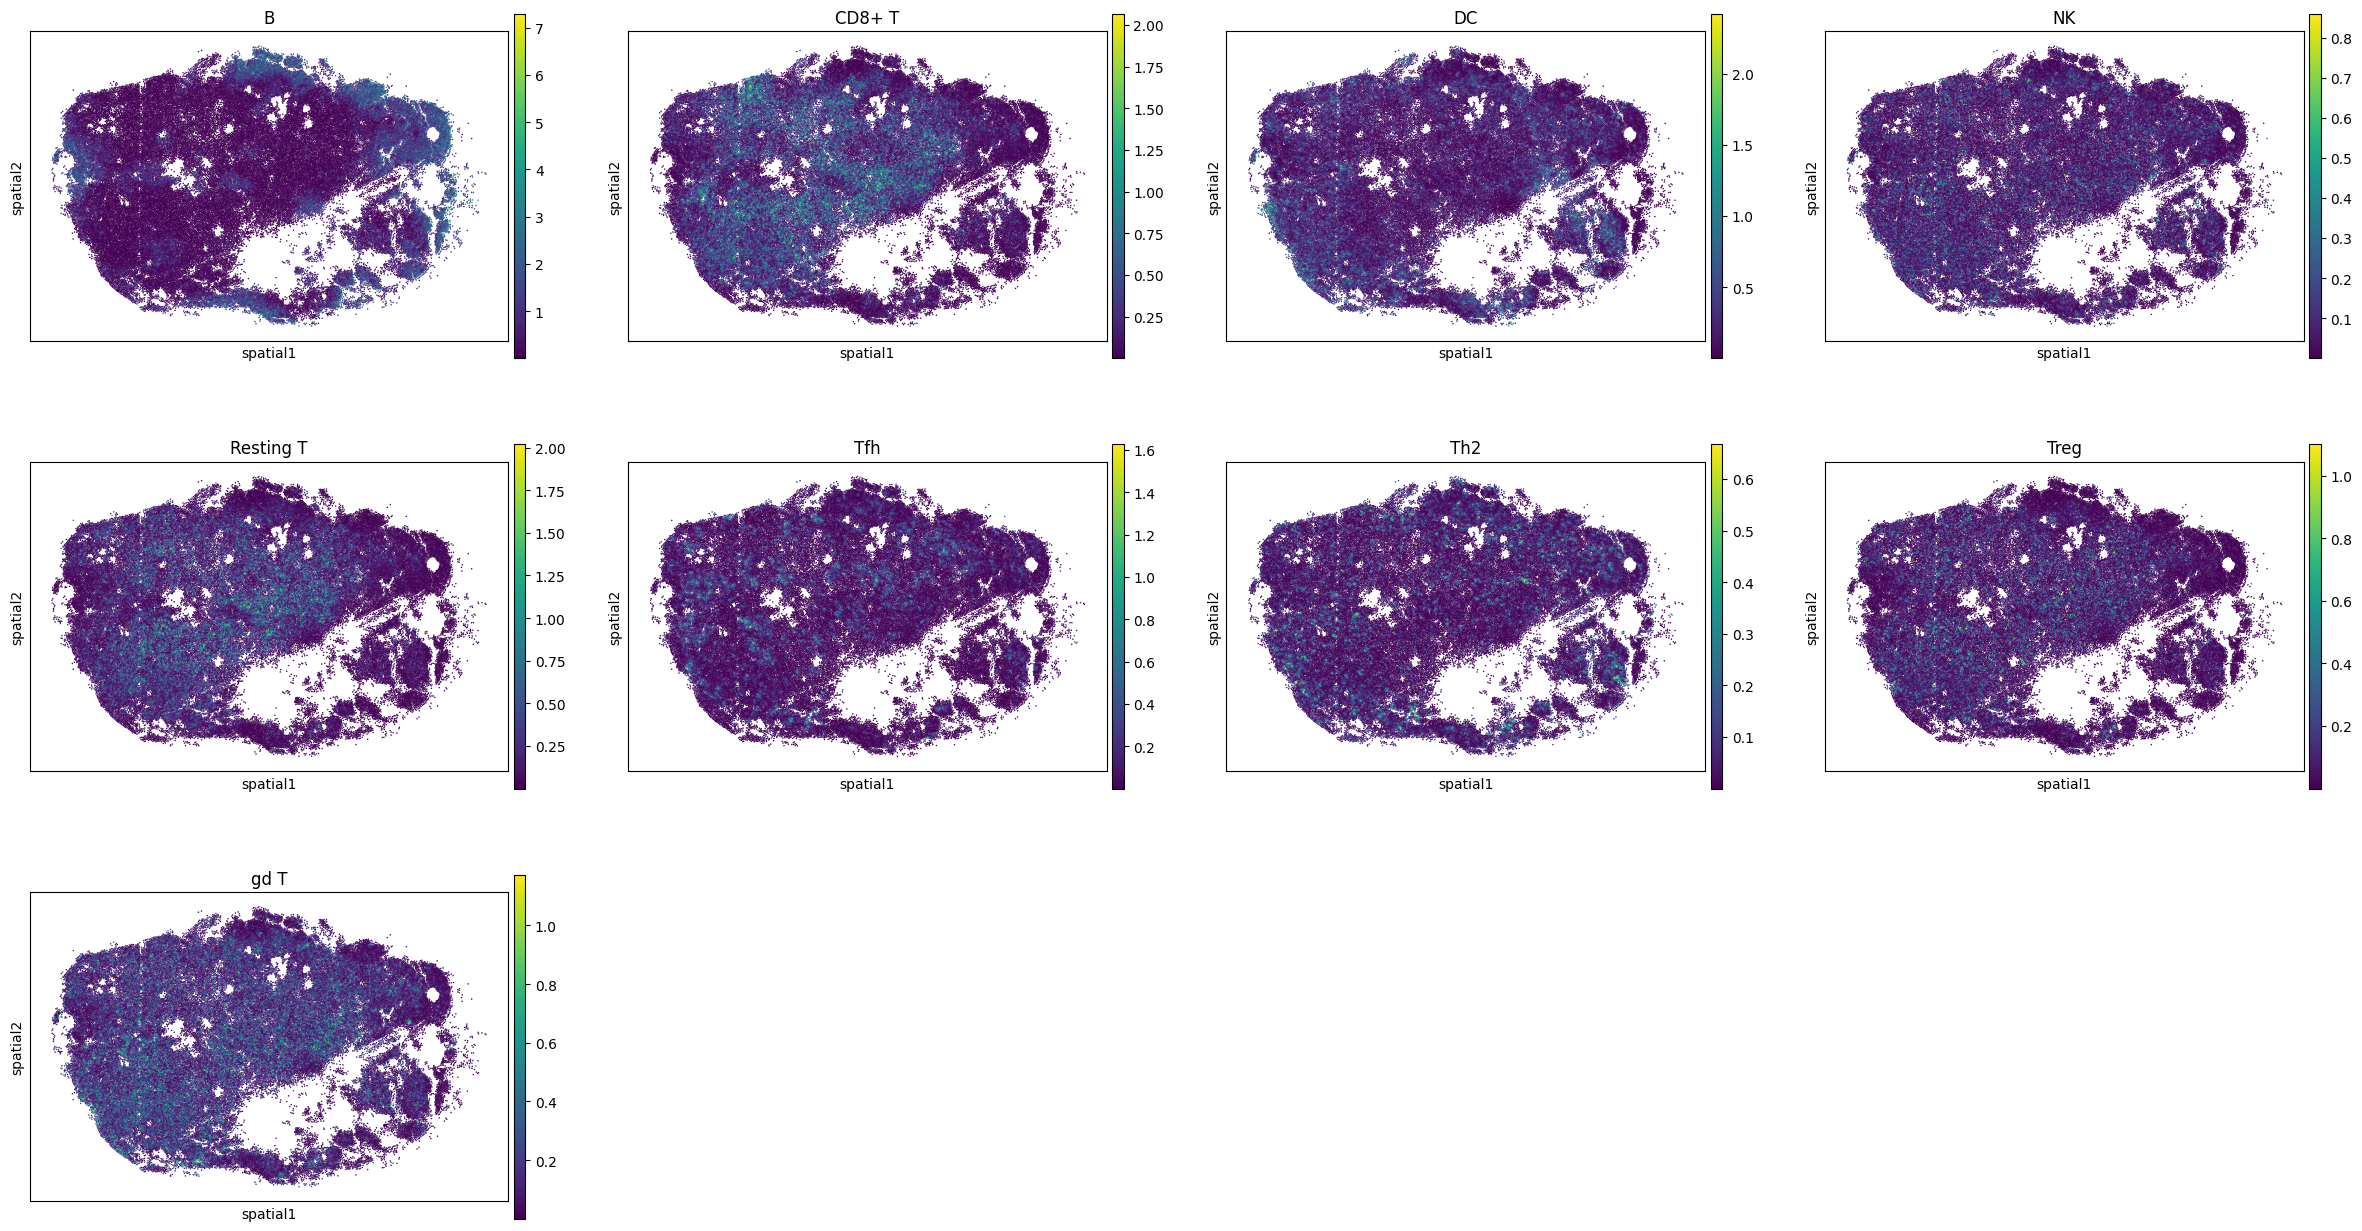

In [11]:
sc.pl.spatial(
    adata, 
    color=['B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T'], 
    spot_size=20
)

In [12]:
adata_ref= sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/rctd_outputs/mouse_lymphnode_slideseq/zhongli_ref_202401203_mannually_woDoublet.h5ad')

abundance = adata_ref.obs['cell_type'].value_counts() / adata_ref.n_obs
abundance

cell_type
B            0.511537
Resting T    0.219024
CD8+ T       0.164974
DC           0.032606
Treg         0.026085
Tfh          0.023577
Th2          0.011788
NK           0.005393
gd T         0.005016
Name: count, dtype: float64

In [13]:
import copy

annotated_adatas = []
cell_types = ['B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T']

df = adata.obs[cell_types]
df_thresholded = copy.deepcopy(df)

for ct in adata_ref.obs['cell_type'].unique():
    threshold = df[ct].quantile(1-abundance[ct])
    df_thresholded[ct] = df[ct].apply(lambda x: x if x >= threshold else 0)

# Get primary annotations (cell type with highest value)
primary_annot = df_thresholded.idxmax(axis=1)

# Get secondary annotations (cell type with second highest value)
secondary_annot = df_thresholded.apply(
    lambda x: x.nlargest(2).index[1] if x.nlargest(2).iloc[1] > 0 else None, 
    axis=1
)

# tertiary_annot = df_thresholded.apply(
#     lambda x: x.nlargest(3).index[2] if x.nlargest(3).iloc[2] > 0 else None, 
#     axis=1
# )

adata.obs['cell_type'] = primary_annot
adata.obs['secondary_annot'] = secondary_annot
# adata.obs['tertiary_annot'] = tertiary_annot

In [14]:
adata.obs['cell_type'].value_counts()

cell_type
B            43117
CD8+ T        9285
Resting T     9162
DC            1720
Tfh           1120
Treg          1098
Th2            364
gd T           271
NK             182
Name: count, dtype: int64

In [15]:
adata.layers['raw_count'] = adata.X.copy()
adata.X.min(), adata.X.max()

(0.0, 601.0)

In [16]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

adata.layers['normalized_count'] = adata.X.copy()

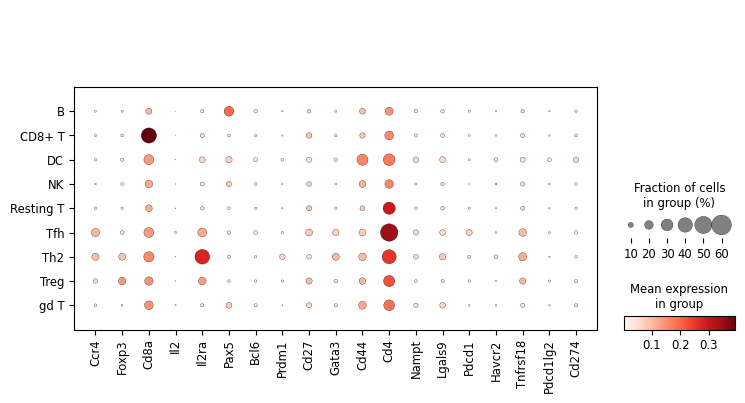

In [17]:
var_names = ['Ccr4', 'Foxp3', 'Cd8a', 'Il2', 'Il2ra', 'Pax5', 'Bcl6', 
    'Prdm1', 'Cd27', 'Gata3', 'Cd44', 'Cd4', 'Nampt', 'Lgals9', 'Pdcd1', 
    'Havcr2', 'Tnfrsf18', 'Pdcd1lg2', 'Cd274']

sc.pl.dotplot(adata, 
    var_names=var_names, swap_axes=False,
    groupby='cell_type')

In [18]:
keep_genes = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1_visiumHD.h5ad').var_names
adata = adata[:, keep_genes]
adata

View of AnnData object with n_obs × n_vars = 66319 × 2116
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_indices', '_scvi_batch', '_scvi_labels', 'B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T', 'cell_type', 'secondary_annot'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'spatial_unscaled', 'stds_cell_abundance_w_sf'
    layers: 'raw_count', 'normalized_count'

In [20]:
# from here, only ran for the control sample

In [19]:
from spaceoracle.tools.network import expand_paired_interactions
import commot as ct 

df_ligrec = ct.pp.ligand_receptor_database(
        database='CellChat', 
        species='mouse', 
        signaling_type=None
    )
            
df_ligrec.columns = ['ligand', 'receptor', 'pathway', 'signaling']
df_ligrec = expand_paired_interactions(df_ligrec)

In [17]:
adata.layers["normalized_count"] = adata.to_df().values.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [18]:
ligand_receptor_genes = np.intersect1d(
    adata.var_names, 
    df_ligrec.ligand.unique().tolist()+df_ligrec.receptor.unique().tolist())


In [19]:
lr_df = adata.to_df(layer='normalized_count').join(
    adata.obs.cell_type).groupby('cell_type').mean()[
        ligand_receptor_genes].mean().sort_values(ascending=False).to_frame().reset_index()
lr_df.columns = ['genes', 'expr']

In [20]:
lr_df['mean_expr'] = lr_df['genes'].apply(lambda x: adata.to_df(layer='normalized_count')[x].mean())

In [21]:
lr_df[lr_df['genes'] == 'Il21']

,genes,expr,mean_expr
216,Il21,0.009684,0.006372


In [22]:
thresh = lr_df['expr'].quantile(0.25)
thresh

0.005488699511805967

In [23]:
adata = adata[:, (adata.var.highly_variable | adata.var_names.isin(
    [
        'Cxcl12','Cxcr4', 'Mif', 'Il2', 'Il4', 
        'Il2ra', 'Pax5', 'Bach2', 'Prdm1', 
        'Bcl6', 'Foxp3', 'Gata3', 'Stat2', 'Stat4', 'Ccr4', 'Foxp3', 'Cd8a', 'Il2', 'Il2ra', 'Pax5', 'Bcl6', 
    'Prdm1', 'Cd27', 'Gata3', 'Cd44', 'Cd4', 'Nampt', 'Lgals9', 'Pdcd1', 
    'Havcr2', 'Tnfrsf18', 'Pdcd1lg2', 'Cd274'
    ] + lr_df.query('expr > @thresh').genes.to_list()
))]

adata

View of AnnData object with n_obs × n_vars = 89296 × 2116
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_indices', '_scvi_batch', '_scvi_labels', 'B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T', 'cell_type', 'secondary_annot'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'spatial_unscaled', 'stds_cell_abundance_w_sf'
    layers: 'raw_count', 'normalized_count'

In [21]:
# control only ends here

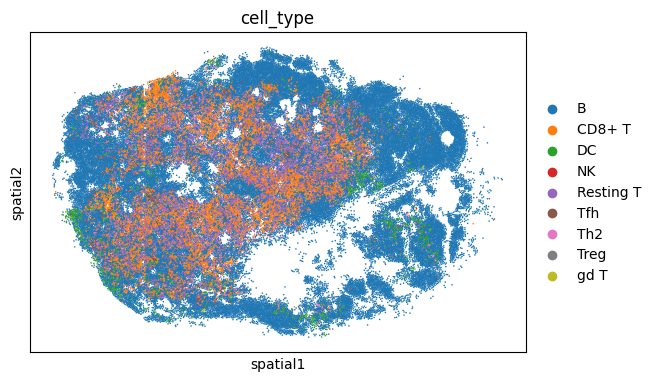

In [22]:
sc.pl.spatial(adata, color='cell_type', spot_size=20)

In [23]:
sc.pp.pca(adata, n_comps=50)

In [24]:
adata

AnnData object with n_obs × n_vars = 66319 × 2116
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_indices', '_scvi_batch', '_scvi_labels', 'B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T', 'cell_type', 'secondary_annot'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'cell_type_colors', 'pca'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'spatial_unscaled', 'stds_cell_abundance_w_sf', 'X_pca'
    varm: 'PCs'
    layers: 'raw_count', 'normalized_count'

In [25]:
for k in ['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_indices', '_scvi_batch', '_scvi_labels', 'B', 'CD8+ T', 'DC', 'NK', 'Resting T', 'Tfh', 'Th2', 'Treg', 'gd T']:
    del adata.obs[k]

# for k in ['mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm']:
#     del adata.var[k]

for k in ['means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'stds_cell_abundance_w_sf',]:
    del adata.obsm[k]

del adata.uns 
del adata.varm 
del adata.obsp 

In [26]:
from pathlib import Path
outdir = Path('/ix/djishnu/shared/djishnu_kor11/training_data_2025')

# adata.write_h5ad(outdir / f'mouse_lymph{sample}_visiumHD.h5ad')
adata.write_h5ad(outdir / f'mouse_lymphKO{sample}_visiumHD.h5ad')

In [27]:
adata

AnnData object with n_obs × n_vars = 66319 × 2116
    obs: 'cell_type', 'secondary_annot'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial', 'spatial_unscaled', 'X_pca'
    layers: 'raw_count', 'normalized_count'

In [28]:
sample

2

In [29]:
adata.obs['cell_type'].value_counts()

cell_type
B            43117
CD8+ T        9285
Resting T     9162
DC            1720
Tfh           1120
Treg          1098
Th2            364
gd T           271
NK             182
Name: count, dtype: int64

In [30]:
adata.X.min(), adata.X.max()

(0.0, 5.596996442007153)

In [31]:
gexes = adata[:, ['Ccr4', 'Prdm1']].to_df(layer='raw_count')
th2 = gexes.loc[adata.obs.cell_type == 'Th2']
tfh = gexes.loc[adata.obs.cell_type == 'Tfh']

n_prdm1_th2 = th2['Prdm1'].astype(bool).sum()
n_ccr4_th2 = th2['Ccr4'].astype(bool).sum()
n_prdm1_tfh = tfh['Prdm1'].astype(bool).sum()
n_ccr4_tfh = tfh['Ccr4'].astype(bool).sum()

n_ccr4_prdm1_th2 = ((th2['Ccr4'].astype(bool)) & (th2['Prdm1'].astype(bool))).sum()
n_ccr4_prdm1_tfh = ((tfh['Ccr4'].astype(bool)) & (tfh['Prdm1'].astype(bool))).sum()

display(pd.DataFrame(
    {
        'Cell Type': ['Th2', 'Th2 Prdm1+', 'Th2 Ccr4+', 'Th2 Prdm1 Ccr4+', 'Tfh', 'Tfh Prdm1+', 'Tfh Ccr4+', 'Tfh Prdm1 Ccr4+'],
        'Count': [th2.shape[0], n_prdm1_th2, n_ccr4_th2, n_ccr4_prdm1_th2, tfh.shape[0], n_prdm1_tfh, n_ccr4_tfh, n_ccr4_prdm1_tfh]
    }
))

,Cell Type,Count
0,Th2,364
1,Th2 Prdm1+,41
2,Th2 Ccr4+,57
3,Th2 Prdm1 Ccr4+,7
4,Tfh,1120
5,Tfh Prdm1+,41
6,Tfh Ccr4+,211
7,Tfh Prdm1 Ccr4+,5


### Compare cell type proportions

In [ ]:
# control = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph1_visiumHD.h5ad')

# ko_1 = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymphKO1_visiumHD.h5ad')
# ko_2 = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymphKO2_visiumHD.h5ad')
# ko_3 = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymphKO3_visiumHD.h5ad')
# ko_4 = sc.read_h5ad('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymphKO4_visiumHD.h5ad')

